In [3]:
%load_ext autoreload
%autoreload 2

# Autoencoder by DeepMicro for human gut microbiome analysis
___

This is for the purpose of isolated testing of the autoencoder by DeepMicro without the Machine Learning part.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
#from keras.models import Model
#from keras.layers import Dense, Input
#from keras.callbacks import History
import os
import time

Import foreign dataset from https://github.com/borenstein-lab/microbiome-metabolome-curated-data/wiki

In [7]:
Model

keras.src.models.model.Model

Load data from DeepMicro

In [ ]:
data_file_path = '/content/DeepMicro/data/UserDataExample.csv'
label_file_path = '/content/DeepMicro/data/UserLabelExample.csv'

# pandas DataFrames
data = pd.read_csv(data_file_path, header=None)
labels = pd.read_csv(label_file_path, header=None)

# numpy arrays
X = data.values
y = labels.values

Show data

In [ ]:
print("Data (first 5 rows):")
print(data.head())

print("\nLabels (first 5 rows):")
print(labels.head())

Data (first 5 rows):
        0         1         2         3         4         5         6    \
0  0.982719  0.180505  0.468251  0.172888  0.047141  0.773570  0.521855   
1  0.206780  0.259105  0.198398  0.196222  0.259591  0.130193  0.735265   
2  0.140053  0.924162  0.478594  0.436538  0.538157  0.604886  0.218273   
3  0.831136  0.882274  0.507386  0.185708  0.406849  0.766236  0.199439   
4  0.700455  0.467607  0.651415  0.108149  0.956156  0.571202  0.302118   

        7         8         9    ...       190       191       192       193  \
0  0.269460  0.382784  0.051954  ...  0.646830  0.705522  0.530382  0.924400   
1  0.229027  0.868035  0.322418  ...  0.675335  0.471772  0.335396  0.840728   
2  0.059622  0.074343  0.646722  ...  0.013924  0.103228  0.414161  0.542502   
3  0.231214  0.633679  0.787436  ...  0.154504  0.601256  0.515027  0.472272   
4  0.036159  0.935017  0.793271  ...  0.380403  0.763209  0.516347  0.335306   

        194       195       196       197      

Show .tsv data and shape. Confirm contents.

In [ ]:
import pandas as pd

# Load the TSV file using the correct delimiter for TSV, which is '\t'
new_data = pd.read_csv('/content/microbiome-metabolome-curated-data/data/processed_data/ERAWIJANTARI_GASTRIC_CANCER_2020/genera.counts.tsv', delimiter='\t')

# Display the first few rows to ensure it's loaded correctly
print(new_data.head())

# Check the shape of the data
print("Data shape:", new_data.shape)

# Check the columns to understand the data better
print("Columns:", new_data.columns.tolist())

# Display the first few rows and columns to get a better understanding of the data
print(new_data.head())

# Display the first few column names to see if there are any labels or identifiers
print("First 10 column names:", new_data.columns[:10])

              Sample  \
0      10776.Healthy   
1      10850.Healthy   
2      10543.Healthy   
3      10246.Healthy   
4  10156.Gastrectomy   

   d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceaniglobus  \
0                                                 17                                                             
1                                                  0                                                             
2                                                  0                                                             
3                                                  0                                                             
4                                                 14                                                             

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium  \
0                                                 42                   

Load data from Borenstein Lab, change tsv to csv

In [ ]:
import pandas as pd

# Load the TSV file without setting the first column as index
file_path = '/content/microbiome-metabolome-curated-data/data/processed_data/ERAWIJANTARI_GASTRIC_CANCER_2020/genera.counts.tsv'
data = pd.read_csv(file_path, delimiter='\t')

# Generate the new CSV filename from the original TSV filename
csv_file_path = file_path.replace('.tsv', '.csv')

# Save it as a CSV file
data.to_csv(csv_file_path, index=False)

# Load and print the new CSV to confirm
new_data = pd.read_csv(csv_file_path)
print(new_data.head())

              Sample  \
0      10776.Healthy   
1      10850.Healthy   
2      10543.Healthy   
3      10246.Healthy   
4  10156.Gastrectomy   

   d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceaniglobus  \
0                                                 17                                                             
1                                                  0                                                             
2                                                  0                                                             
3                                                  0                                                             
4                                                 14                                                             

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium  \
0                                                 42                   

Delete first row (headers). Convert data into 2 files. Both numerical, one with labels (binary) and the other with features only. Show data.

In [ ]:
import pandas as pd

# Define the directory
directory = '/content/microbiome-metabolome-curated-data/data/processed_data/ERAWIJANTARI_GASTRIC_CANCER_2020/'
filename = directory + 'genera.counts.csv'

# Step 1: Remove the first row (header) before loading with pandas
DELETE_LINE_NUMBER = 1

with open(filename) as f:
    data = f.read().splitlines()  # Read CSV file line by line

# Write the file back without the first row (header)
with open(filename, 'w') as f:
    f.write('\n'.join(data[DELETE_LINE_NUMBER:]))  # Skipping the first row

# Step 2: Load the CSV file without headers (since we removed them)
data = pd.read_csv(filename, header=None)

# Step 3: Extract the sample names and create a binary label column
# Assuming the first column contains labels like "Healthy" or "Gastrectomy"
data['BinaryLabel'] = data[0].apply(lambda x: 0 if 'Healthy' in x else 1)

# Step 4: Separate the features and labels
features = data.drop(columns=[0, 'BinaryLabel'])  # Dropping the first column and the BinaryLabel column
labels = data[['BinaryLabel']]

# Step 5: Save the features and labels to separate CSV files in the same directory without headers
features.to_csv(directory + 'features.csv', index=False, header=False)
labels.to_csv(directory + 'labels.csv', index=False, header=False)

# Print to confirm
print("Features Preview:")
print(features.head())
print("\nLabels Preview:")
print(labels.head())

Features Preview:
   1      2      3      4      5      6      7      8      9      10     ...  \
0     17     42    374   1569     24    597    120     53      0   1041  ...   
1      0     25     75    502     57    237     30     10    154     21  ...   
2      0    104    239    815     38   4763    186    103      0    255  ...   
3      0      0    108    580     26    446     47     35     57     13  ...   
4     14     75   3622   2875     44    461    164      0      0     79  ...   

   10518  10519  10520  10521  10522  10523  10524  10525  10526  10527  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 10527 columns]

Labels Preview:
   BinaryLabel

Normalising features.csv between 0 and 1 (Min-Max scaling)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the directory
directory = '/content/microbiome-metabolome-curated-data/data/processed_data/ERAWIJANTARI_GASTRIC_CANCER_2020/'

# Step 1: Load the features and labels after they've been separated
features = pd.read_csv(directory + 'features.csv', header=None)
labels = pd.read_csv(directory + 'labels.csv', header=None)

# Step 2: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler to the features and transform the features to normalize them
features_normalized = scaler.fit_transform(features)

# Step 4: Convert the normalized features back to a DataFrame if needed
features_normalized_df = pd.DataFrame(features_normalized)

# Step 5: Save the normalized features back to CSV
features_normalized_df.to_csv(directory + 'features_normalized.csv', index=False, header=False)

# Print to confirm
print("Normalized Features Preview:")
print(features_normalized_df.head())

# You can leave the labels file as is, or load it if you want to confirm its structure
print("\nLabels Preview:")
print(labels.head())

Normalized Features Preview:
      0         1         2         3         4         5         6      \
0  0.066929  0.002045  0.038979  0.031220  0.048583  0.037521  0.001916   
1  0.000000  0.001217  0.006515  0.007595  0.115385  0.011939  0.000304   
2  0.000000  0.005064  0.024321  0.014525  0.076923  0.333570  0.003099   
3  0.000000  0.000000  0.010098  0.009322  0.052632  0.026791  0.000609   
4  0.055118  0.003652  0.391640  0.060136  0.089069  0.027857  0.002705   

      7         8         9      ...  10517  10518  10519  10520  10521  \
0  0.378571  0.000000  0.012250  ...    0.0    0.0    0.0    0.0    0.0   
1  0.071429  0.122807  0.000247  ...    0.0    0.0    0.0    0.0    0.0   
2  0.735714  0.000000  0.003001  ...    0.0    0.0    0.0    0.0    0.0   
3  0.250000  0.045455  0.000153  ...    0.0    0.0    0.0    0.0    0.0   
4  0.000000  0.000000  0.000930  ...    0.0    0.0    0.0    0.0    0.0   

   10522  10523  10524  10525  10526  
0    0.0    0.0    0.0    0.0 

Additional preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming X_train and X_test are your data
scaler = StandardScaler()  # or MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a more complex autoencoder
def enhanced_autoencoder(dims, act='relu', init='glorot_uniform'):
    x = Input(shape=(dims[0],), name='input')
    h = Dense(256, activation=act, kernel_initializer=init)(x)
    h = Dense(128, activation=act, kernel_initializer=init)(h)
    h = Dense(64, activation=act, kernel_initializer=init)(h)  # Bottleneck here
    y = Dense(128, activation=act, kernel_initializer=init)(h)
    y = Dense(256, activation=act, kernel_initializer=init)(y)
    y = Dense(dims[0], activation='sigmoid', kernel_initializer=init)(y)
    return Model(inputs=x, outputs=y, name='Enhanced_AE')

# Initialize and compile the new autoencoder
enhanced_ae = enhanced_autoencoder([X_train_scaled.shape[1]])
enhanced_ae.compile(optimizer='adam', loss='mse')

# Fit model
history = enhanced_ae.fit(X_train_scaled, X_train_scaled,
                          epochs=100,
                          batch_size=64,
                          validation_data=(X_test_scaled, X_test_scaled),
                          verbose=2)

Epoch 1/100
2/2 - 2s - 1s/step - loss: 1.2157 - val_loss: 46.4305
Epoch 2/100
2/2 - 0s - 182ms/step - loss: 1.1965 - val_loss: 46.3679
Epoch 3/100
2/2 - 0s - 158ms/step - loss: 1.0995 - val_loss: 46.3040
Epoch 4/100
2/2 - 0s - 132ms/step - loss: 0.9859 - val_loss: 46.2888
Epoch 5/100
2/2 - 0s - 149ms/step - loss: 0.9548 - val_loss: 46.2909
Epoch 6/100
2/2 - 0s - 136ms/step - loss: 0.9571 - val_loss: 46.2930
Epoch 7/100
2/2 - 0s - 140ms/step - loss: 0.9549 - val_loss: 46.2940
Epoch 8/100
2/2 - 0s - 141ms/step - loss: 0.9525 - val_loss: 46.2944
Epoch 9/100
2/2 - 0s - 137ms/step - loss: 0.9500 - val_loss: 46.2946
Epoch 10/100
2/2 - 0s - 142ms/step - loss: 0.9471 - val_loss: 46.2946
Epoch 11/100
2/2 - 0s - 146ms/step - loss: 0.9440 - val_loss: 46.2947
Epoch 12/100
2/2 - 0s - 139ms/step - loss: 0.9411 - val_loss: 46.2948
Epoch 13/100
2/2 - 0s - 140ms/step - loss: 0.9381 - val_loss: 46.2949
Epoch 14/100
2/2 - 0s - 118ms/step - loss: 0.9345 - val_loss: 46.2949
Epoch 15/100
2/2 - 0s - 103ms/st

Visualising

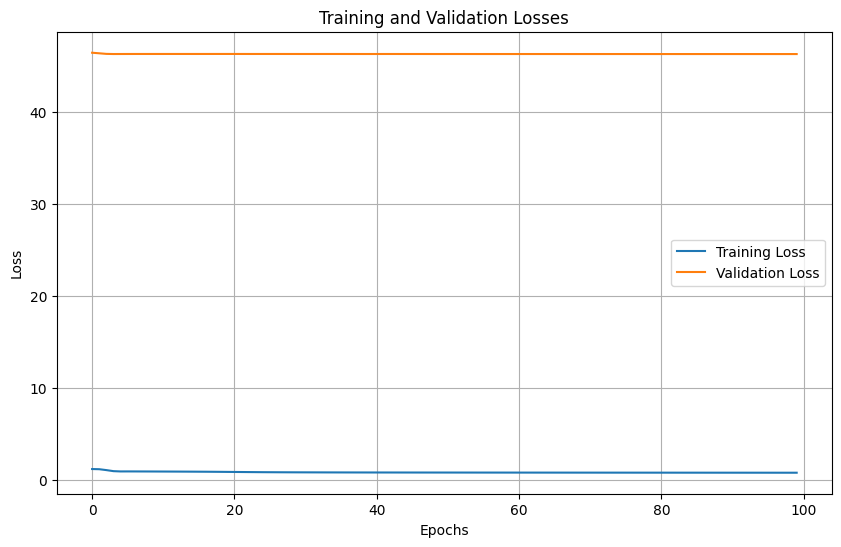

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Split DeepMicro data in training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and label arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

Split Borenstein Lab data in training and testing sets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the directory
directory = '/content/microbiome-metabolome-curated-data/data/processed_data/ERAWIJANTARI_GASTRIC_CANCER_2020/'

# Load the features and labels
features = pd.read_csv(directory + 'features_normalized.csv', header=None)
labels = pd.read_csv(directory + 'labels.csv', header=None)

# Splitting the data into training and test sets while keeping features and labels aligned
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Save the split data back into the directory if needed
X_train.to_csv(directory + 'X_train.csv', index=False)
X_test.to_csv(directory + 'X_test.csv', index=False)
y_train.to_csv(directory + 'y_train.csv', index=False)
y_test.to_csv(directory + 'y_test.csv', index=False)

# Print to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (76, 10527)
X_test shape: (20, 10527)
y_train shape: (76, 1)
y_test shape: (20, 1)


Scaling methods

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler only on the training data
X_test_scaled = scaler.transform(X_test)        # Apply the same transformation to the test data

# Applying PCA for dimensionality reduction (optional)
pca = PCA(n_components=50)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit PCA on the scaled training data
X_test_pca = pca.transform(X_test_scaled)        # Apply the transformation to the scaled test data

# Save the preprocessed split data back into the directory if needed
pd.DataFrame(X_train_pca).to_csv(directory + 'X_train_pca.csv', index=False, header=False)
pd.DataFrame(X_test_pca).to_csv(directory + 'X_test_pca.csv', index=False, header=False)
y_train.to_csv(directory + 'y_train.csv', index=False, header=False)
y_test.to_csv(directory + 'y_test.csv', index=False, header=False)

# Print to confirm
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_pca shape: (76, 50)
X_test_pca shape: (20, 50)
y_train shape: (76, 1)
y_test shape: (20, 1)


#Autoencoder

In [ ]:
def autoencoder(dims, act='relu', init='glorot_uniform', latent_act=False, output_act=False):
    if latent_act:
        l_act = act
    else:
        l_act = None

    if output_act:
        o_act = 'sigmoid'
    else:
        o_act = None

    n_internal_layers = len(dims) - 2
    x = Input(shape=(dims[0],), name='input')
    h = x

    for i in range(n_internal_layers):
        h = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(h)

    h = Dense(dims[-1], activation=l_act, kernel_initializer=init, name='encoder_%d_bottle-neck' % (n_internal_layers))(h)
    y = h

    for i in range(n_internal_layers, 0, -1):
        y = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(y)

    y = Dense(dims[0], activation=o_act, kernel_initializer=init, name='decoder_0')(y)

    return Model(inputs=x, outputs=y, name='AE'), Model(inputs=x, outputs=h, name='encoder')

input_dim = X_train.shape[1]
dims = [input_dim, 64, 32, 16]  # Example architecture

# Initialize and capture both the autoencoder and encoder
autoencoder_model, encoder_model = autoencoder(dims)

# Compile the autoencoder model
autoencoder_model.compile(optimizer='adam', loss='mse')

Autoencoder for preprocessed data.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

def autoencoder(dims, act='relu', init='glorot_uniform', latent_act=False, output_act=False):
    if latent_act:
        l_act = act
    else:
        l_act = None

    if output_act:
        o_act = 'sigmoid'  # Adjust based on your data scaling
    else:
        o_act = None

    n_internal_layers = len(dims) - 2
    x = Input(shape=(dims[0],), name='input')
    h = x

    # Encoder
    for i in range(n_internal_layers):
        h = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(h)

    # Latent space (bottleneck)
    h = Dense(dims[-1], activation=l_act, kernel_initializer=init, name='encoder_%d_bottle-neck' % (n_internal_layers))(h)
    y = h

    # Decoder
    for i in range(n_internal_layers, 0, -1):
        y = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(y)

    y = Dense(dims[0], activation=o_act, kernel_initializer=init, name='decoder_0')(y)

    return Model(inputs=x, outputs=y, name='AE'), Model(inputs=x, outputs=h, name='encoder')

# Use the PCA-transformed feature dimension as input
input_dim = X_train_pca.shape[1]
dims = [input_dim, 32, 16, 8]  # Example architecture with smaller latent space

# Initialize and capture both the autoencoder and encoder
autoencoder_model, encoder_model = autoencoder(dims)

# Compile the autoencoder model
autoencoder_model.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder_model.fit(X_train_pca, X_train_pca,
                                epochs=500,
                                batch_size=32,
                                validation_data=(X_test_pca, X_test_pca),
                                verbose=2)

# You can now use `encoder_model` to get the latent representations of your data

NameError: name 'X_train_pca' is not defined

Train the autoencoder

In [ ]:
history = autoencoder_model.fit(X_train, X_train,
                                epochs=500,
                                batch_size=64,
                                validation_data=(X_test, X_test),
                                verbose=2)

Epoch 1/500
2/2 - 2s - 1s/step - loss: 0.0255 - val_loss: 0.0210
Epoch 2/500
2/2 - 0s - 142ms/step - loss: 0.0253 - val_loss: 0.0208
Epoch 3/500
2/2 - 0s - 64ms/step - loss: 0.0250 - val_loss: 0.0205
Epoch 4/500
2/2 - 0s - 69ms/step - loss: 0.0245 - val_loss: 0.0199
Epoch 5/500
2/2 - 0s - 52ms/step - loss: 0.0235 - val_loss: 0.0193
Epoch 6/500
2/2 - 0s - 66ms/step - loss: 0.0223 - val_loss: 0.0187
Epoch 7/500
2/2 - 0s - 56ms/step - loss: 0.0212 - val_loss: 0.0182
Epoch 8/500
2/2 - 0s - 63ms/step - loss: 0.0204 - val_loss: 0.0180
Epoch 9/500
2/2 - 0s - 70ms/step - loss: 0.0201 - val_loss: 0.0180
Epoch 10/500
2/2 - 0s - 69ms/step - loss: 0.0201 - val_loss: 0.0180
Epoch 11/500
2/2 - 0s - 45ms/step - loss: 0.0200 - val_loss: 0.0180
Epoch 12/500
2/2 - 0s - 48ms/step - loss: 0.0200 - val_loss: 0.0180
Epoch 13/500
2/2 - 0s - 69ms/step - loss: 0.0199 - val_loss: 0.0179
Epoch 14/500
2/2 - 0s - 48ms/step - loss: 0.0198 - val_loss: 0.0179
Epoch 15/500
2/2 - 0s - 67ms/step - loss: 0.0197 - val_los

Evaluate autoencoder

In [ ]:
loss = ae.evaluate(X_test_pca, X_test_pca)
print(f'Test Loss: {loss}')

NameError: name 'ae' is not defined

#Training and validation loss

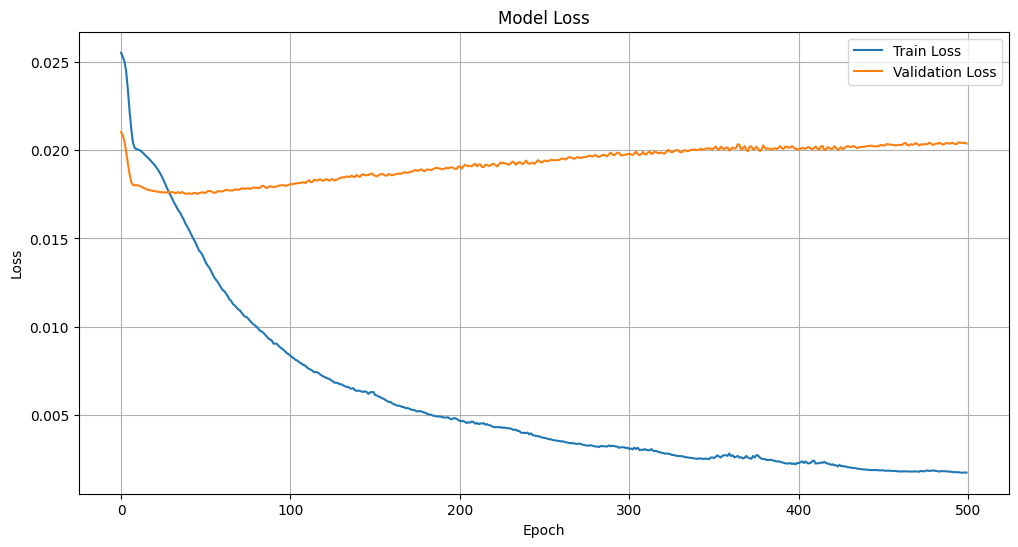

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

#Visual Comparison of Original and Reconstructed Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure X_test is a numpy array for easy indexing
# If X_test is a DataFrame, convert it to a numpy array
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.values
else:
    X_test_array = X_test

# Predict the reconstructed outputs
reconstructed = autoencoder_model.predict(X_test_array)

# Select a few samples to display
n_samples = 10
sample_indices = np.random.choice(np.arange(len(X_test_array)), n_samples, replace=False)

# Visualize the original and reconstructed samples
plt.figure(figsize=(20, 4))
for i, index in enumerate(sample_indices, 1):
    # Display original
    ax = plt.subplot(2, n_samples, i)
    plt.plot(X_test_array[index])  # Adjust plotting for non-image data
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n_samples, i + n_samples)
    plt.plot(reconstructed[index])  # Adjust plotting for non-image data
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

ValueError: Input 0 of layer "AE" is incompatible with the layer: expected shape=(None, 50), found shape=(20, 10527)

#Reconstruction Error Histogram:
Analyzes the distribution of reconstruction errors, which helps in understanding how well the autoencoder is reconstructing the input data

In [ ]:
# Reconstruct the data
X_reconstructed = ae.predict(X_test)

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(X_test - X_reconstructed), axis=1)

# Plot histogram of reconstruction errors
plt.figure(figsize=(12, 6))
plt.hist(reconstruction_error, bins=50, alpha=0.75)
plt.title('Histogram of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

NameError: name 'ae' is not defined

#Latent Space Visualization:
Visualize the latent representations in 2D or 3D to inspect how well the autoencoder is clustering the data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


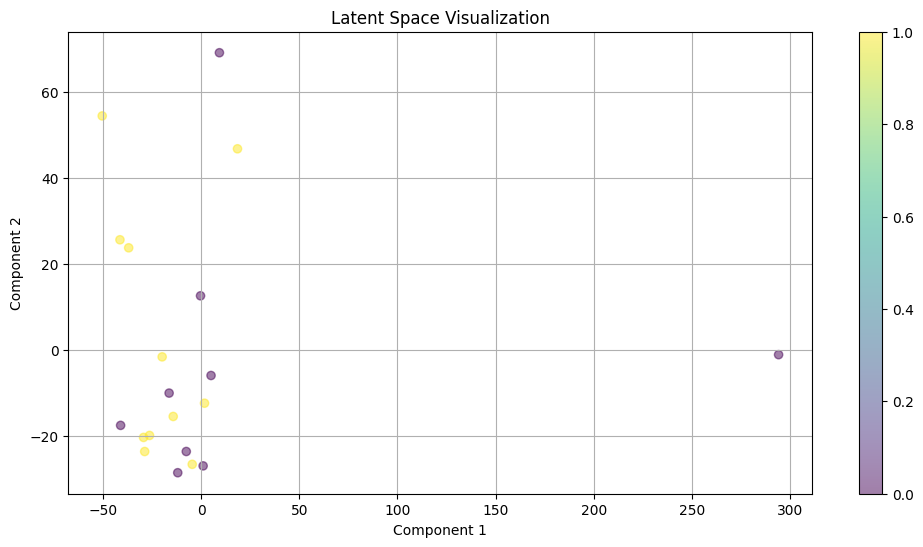

In [ ]:
encoded_data = encoder_model.predict(X_test_pca)

# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data)

# Plot the reduced data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_test.values.ravel(), cmap='viridis', alpha=0.5)
plt.title('Latent Space Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.grid(True)
plt.show()